<a href="https://colab.research.google.com/github/silvererudite/ML_algos_onSomeDatasets/blob/master/iris.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Import the necessary modules. We will keep this project extremely simple so only work with pandas and numpy and nothing fancy.

In [ ]:
import pandas as pd
import numpy as np


Let's import the iris dataset which is luckily built in in the Scikit learn module. The `load_iris()` function conveniently returns the data points and target column in separate columns. To make our lives fursther easier we will convert them to pandas dataframes so that we can do some data wrangling and exploration.

In [ ]:
from sklearn.datasets import load_iris

data = load_iris()
iris_data = pd.DataFrame(data.data, columns=data.feature_names)
iris_target = pd.DataFrame(data.target, columns=['iris_class'])
print(iris_data.head())
print(iris_target.head())

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                5.1               3.5                1.4               0.2
1                4.9               3.0                1.4               0.2
2                4.7               3.2                1.3               0.2
3                4.6               3.1                1.5               0.2
4                5.0               3.6                1.4               0.2
   iris_class
0           0
1           0
2           0
3           0
4           0


#### Replace the target name with their actual values
The iris dataset consists of three kinds of flowers represented by 0,1, 2 in the target column. You can inspect it by logging `data.target_names` as mentioned by the scikit-leran docs.

In [ ]:
iris_target = iris_target['iris_class'].replace({0: 'setosa', 1: 'versicolor', 2: 'virginica'})

#### Split the data
We need to split the data into train, test sets to validate our model and see how well our model would generalize to unknown data. We will train the model with 80% of the data and test with the rest of 20% data.

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(iris_data, iris_target, test_size=0.2, random_state=42)

#### Exploratoray analysis (EDA)
Before we dive into creating models we need to understand our data and take into account the underlying distribution and correlations. Doing so would help us decide on a machine learning model to choose for this particular dataset.

We want to find out a quick summary statistics to get an idea about the min max values and mean values of all the columns. It makes sense here to do this step as the dataset contains all numerical values.

In [ ]:
X_train.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,120.000000,120.000000,120.000000,120.000000
mean,5.809167,3.061667,3.726667,1.183333
std,0.823805,0.449123,1.752345,0.752289
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.500000,0.300000
50%,5.750000,3.000000,4.250000,1.300000
75%,6.400000,3.400000,5.100000,1.800000
max,7.700000,4.400000,6.700000,2.500000


We also want to see if our dataset contains any missing values or incompatible data types. Luckily there's no such case for this dataset.

In [ ]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 120 entries, 22 to 102
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  120 non-null    float64
 1   sepal width (cm)   120 non-null    float64
 2   petal length (cm)  120 non-null    float64
 3   petal width (cm)   120 non-null    float64
dtypes: float64(4)
memory usage: 4.7 KB


#### Correlation between features
It's useful to find out correlation between features as we can possibly eliminate one of the highly correlated features to simplify our model. By doing so, you can see that the `sepal length (cm)` and `petal length (cm)`, `petal width (cm)` and `petal length (cm)` are highly correlated with each other. So we can use only one of them to eliminate redundancy.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f7a842c0c90>,
      dtype=object)

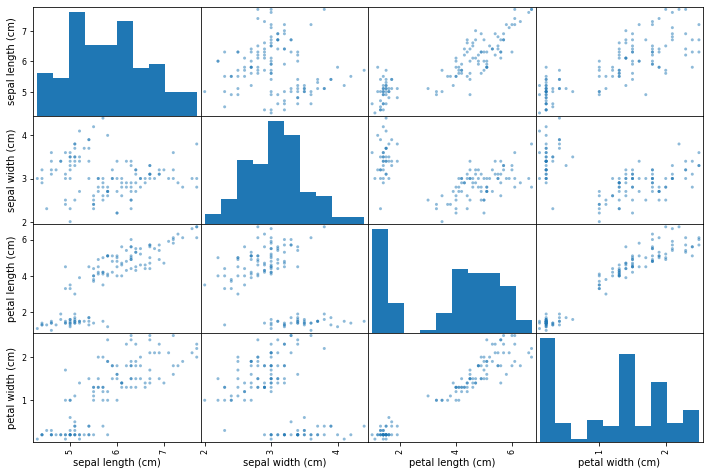

In [ ]:
from pandas.plotting import scatter_matrix
scatter_matrix(X_train, figsize=(12,8))

Let's see the how the data points are distributed by plotting two scatter plots of petal, sepal length and widths. By looking at the plots it seems that there is a class separation of more than two dimensions. Knn can be a good classifier in this case.


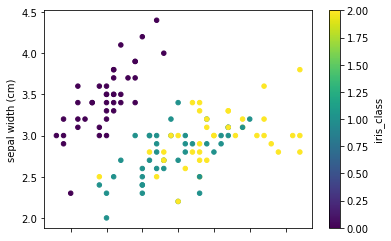

In [ ]:
y = y_train.replace({'setosa':0,'versicolor': 1,'virginica': 2})
full_data = pd.concat([X_train, y], axis=1)
full_data.plot.scatter(x='sepal length (cm)', y='sepal width (cm)',  c='iris_class',
                      colormap='viridis')


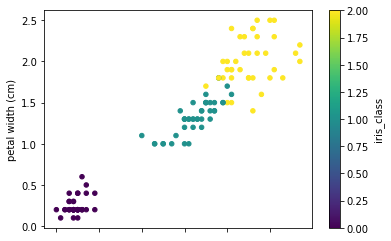

In [ ]:
full_data.plot.scatter(x='petal length (cm)', y='petal width (cm)',  c='iris_class',
                      colormap='viridis')

#### Start modelling

Since this is a fairly simple dataset with all numeric values and no missing, faulty values we can skip a lot of preprocessing tasks and jump straight to creating models. As it is a classification task, and from our previous inference,  we will use `KNeighbors`  classifier with 5 neighbors.

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train[['petal length (cm)','petal width (cm)']], y_train)
y_pred = knn.predict(X_test[['petal length (cm)','petal width (cm)']])
from sklearn import metrics

print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 1.0


Hurray, it predicts with an accuracy of 100%.